<a href="https://colab.research.google.com/github/sakipatsu/Rabbit_Challenge/blob/main/4_3_keras_codes_after.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 準備

## Googleドライブのマウント

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## sys.pathの設定

以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

In [11]:
import sys
#sys.path.append('/content/drive/My Drive/DNN_code')
sys.path.append('/content/drive/MyDrive/StudyAI/Step4')

# keras

## 線形回帰

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Generation: 10. 誤差 = 2.9522102
Generation: 20. 誤差 = 2.004505
Generation: 30. 誤差 = 1.3676709
Generation: 40. 誤差 = 0.93889916
Generation: 50. 誤差 = 0.6494889
Generation: 60. 誤差 = 0.45351645
Generation: 70. 誤差 = 0.32027295
Generation: 80. 誤差 = 0.22921234
Generation: 90. 誤差 = 0.16657974
Generation: 100. 誤差 = 0.12315835
Generation: 110. 誤差 = 0.09276566
Generation: 120. 誤差 = 0.07124856
Generation: 130. 誤差 = 0.05581193
Generation: 140. 誤差 = 0.044570122
Generation: 150. 誤差 = 0.036247086
Generation: 160. 誤差 = 0.029976103
Generation: 170. 誤差 = 0.025165325
Generation: 180. 誤差 = 0.021408336
Generation: 190. 誤差 = 0.018423771
Generation: 200. 誤差 = 0.016015084
G

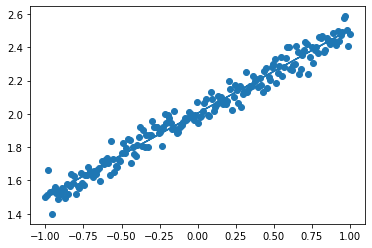

In [12]:
%tensorflow_version 1.x
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np
import matplotlib.pyplot as plt

iters_num = 1000
plot_interval = 10

x = np.linspace(-1, 1, 200)
np.random.shuffle(x)
d = 0.5 * x + 2 + np.random.normal(0, 0.05, (200,))

from keras.models import Sequential
from keras.layers import Dense

# モデルを作成
model = Sequential()
model.add(Dense(input_dim=1, units=1))
#model.add(Dense(input_dim=1, output_dim=1))

# モデルを表示
model.summary()

# モデルのコンパイル
model.compile(loss='mse', optimizer='sgd')

# train
for i in range(iters_num):
    loss = model.train_on_batch(x, d)
    if (i+1) % plot_interval == 0:
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss))

W, b = model.layers[0].get_weights()
print('W:', W)
print('b:', b)

y = model.predict(x)
plt.scatter(x, d)
plt.plot(x, y)
plt.show()

## 単純パーセプトロン 
OR回路

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  np.random.seed(0)をnp.random.seed(1)に変更
        False,True,True,True
-  エポック数を100に変更
        True, True,True,True
-  AND回路, XOR回路に変更
        OR, ANDは線形分離可能だが, XORは線形分離不可能なので学習できない
-  OR回路にしてバッチサイズを10に変更
        False,True,True,True
-  エポック数を300に変更しよう
        True, True,True,True
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [13]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

# モジュール読み込み
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
 
# 乱数を固定値で初期化
np.random.seed(0)

# シグモイドの単純パーセプトロン作成
model = Sequential()
model.add(Dense(input_dim=2, units=1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
 
# トレーニング用入力 X と正解データ T
X = np.array( [[0,0], [0,1], [1,0], [1,1]] )
T = np.array( [[0], [1], [1], [1]] )
 
# トレーニング
model.fit(X, T, epochs=30, batch_size=1)
 
# トレーニングの入力を流用して実際に分類
Y = model.predict_classes(X, batch_size=1)

print("TEST")
print(Y == T)


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1)                 3         
_________________________________________________________________
activation_12 (Activation)   (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
4/4 [==============================] - 0s 24ms/step - loss: 0.4352
Epoch 2/30
4/4 [==============================] - 0s 3ms/step - loss: 0.4204
Epoch 3/30
4/4 [==============================] - 0s 3ms/step - loss: 0.4079
Epoch 4/30
4/4 [==============================] - 0s 2ms/step - loss: 0.3971
Epoch 5/30
4/4 [==============================] - 0s 2ms/step - loss: 0.3876
Epoch 6/30
4/4 [==============================] - 0s 2ms/step - loss: 0.3790
Epoch 7/30
4/4 [==============================] - 0s 2ms/st

## 分類 (iris)

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  中間層の活性関数をsigmoidに変更しよう
-  SGDをimportしoptimizerをSGD(lr=0.1)に変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 12)                60        
_________________________________________________________________
activation_13 (Activation)   (None, 12)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 39        
_________________________________________________________________
activation_14 (Activation)   (None, 3)                 0         
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________
Train on 120 samples, validate on 30 samples
Epoch 1/20
120/120 [==============================] - 0s 1ms/step - loss: 0.9171 - accuracy: 0.4500 - val_loss: 0.7723 - val_accuracy: 0.7000
Epoch 2/20
120/120 [==============================] - 0s 273us/step 

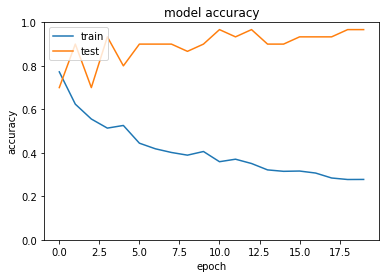

In [14]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
d = iris.target

# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, d_train, d_test = train_test_split(x, d, test_size=0.2)

from keras.models import Sequential
from keras.layers import Dense, Activation
# from keras.optimizers import SGD

#モデルの設定
model = Sequential()
model.add(Dense(12, input_dim=4))
model.add(Activation('relu'))
# model.add(Activation('sigmoid'))
model.add(Dense(3, input_dim=12))
model.add(Activation('softmax'))
model.summary()

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, d_train, batch_size=5, epochs=20, verbose=1, validation_data=(x_test, d_test))
loss = model.evaluate(x_test, d_test, verbose=0)

#Accuracy
print(history.history)
#plt.plot(history.history['acc'])
plt.plot(history.history['val_loss'])
#plt.plot(history.history['val_acc'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1.0)
plt.show()


## 分類 (mnist)

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  load_mnistのone_hot_labelをFalseに変更しよう (error)
-  誤差関数をsparse_categorical_crossentropyに変更しよう
-  Adamの引数の値を変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [15]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

# 必要なライブラリのインポート
import keras
import matplotlib.pyplot as plt
from data.mnist import load_mnist

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=False)

# 必要なライブラリのインポート、最適化手法はAdamを使う
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# モデル作成
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

# バッチサイズ、エポック数
batch_size = 128
epochs = 20

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), 
              metrics=['accuracy'])

history = model.fit(x_train, d_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, d_test))
loss = model.evaluate(x_test, d_test, verbose=0)
print('Test loss:', loss[0])
print('Test accuracy:', loss[1])
#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.ylim(0, 1.0)
plt.show()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


ValueError: ignored

## CNN分類 (mnist)
#### 実行に時間がかかるため割愛

In [ ]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

# 必要なライブラリのインポート
import keras
import matplotlib.pyplot as plt
from data.mnist import load_mnist

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)


# 行列として入力するための加工
batch_size = 128
num_classes = 10
epochs = 20

img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)


# 必要なライブラリのインポート、最適化手法はAdamを使う
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

# バッチサイズ、エポック数
batch_size = 128
epochs = 20

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(x_train, d_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, d_test))

#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.ylim(0, 1.0)
plt.show()

## cifar10
#### 実行に時間がかかるため割愛
データセット cifar10<br>
32x32ピクセルのカラー画像データ<br>
10種のラベル「飛行機、自動車、鳥、猫、鹿、犬、蛙、馬、船、トラック」<br>
トレーニングデータ数:50000, テストデータ数:10000<br>
http://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

#CIFAR-10のデータセットのインポート
from keras.datasets import cifar10
(x_train, d_train), (x_test, d_test) = cifar10.load_data()

#CIFAR-10の正規化
from keras.utils import to_categorical
  
# 特徴量の正規化
x_train = x_train/255.
x_test = x_test/255.
 
# クラスラベルの1-hotベクトル化
d_train = to_categorical(d_train, 10)
d_test = to_categorical(d_test, 10)
 
# CNNの構築
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
import numpy as np
 
model = Sequential()
 
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
 
# コンパイル
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
 
#訓練
history = model.fit(x_train, d_train, epochs=20)
 
# モデルの保存
model.save('./CIFAR-10.h5')
 
#評価 & 評価結果出力
print(model.evaluate(x_test, d_test))

## RNN

2進数足し算の予測

Keras RNNのドキュメント
https://keras.io/ja/layers/recurrent/#simplernn

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  RNNの出力ノード数を128に変更
-  RNNの出力活性化関数を sigmoid に変更
-  RNNの出力活性化関数を tanh に変更
-  最適化方法をadamに変更
-  RNNの入力 Dropout を0.5に設定
-  RNNの再帰 Dropout を0.3に設定
-  RNNのunrollをTrueに設定

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout,Activation
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import SGD
from keras.layers.recurrent import SimpleRNN, LSTM, GRU


# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)

# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)], dtype=np.uint8).T,axis=1)[:, ::-1]


# A, B初期化 (a + b = d)
a_int = np.random.randint(largest_number/2, size=20000)
a_bin = binary[a_int] # binary encoding
b_int = np.random.randint(largest_number/2, size=20000)
b_bin = binary[b_int] # binary encoding

x_int = []
x_bin = []
for i in range(10000):
    x_int.append(np.array([a_int[i], b_int[i]]).T)
    x_bin.append(np.array([a_bin[i], b_bin[i]]).T)

x_int_test = []
x_bin_test = []
for i in range(10001, 20000):
    x_int_test.append(np.array([a_int[i], b_int[i]]).T)
    x_bin_test.append(np.array([a_bin[i], b_bin[i]]).T)

x_int = np.array(x_int)
x_bin = np.array(x_bin)
x_int_test = np.array(x_int_test)
x_bin_test = np.array(x_bin_test)


# 正解データ
d_int = a_int + b_int
d_bin = binary[d_int][0:10000]
d_bin_test = binary[d_int][10001:20000]

model = Sequential()

model.add(SimpleRNN(units=16,
               return_sequences=True,
               input_shape=[8, 2],
               go_backwards=False,
               activation='relu',
               # dropout=0.5,
               # recurrent_dropout=0.3,
               # unroll = True,
            ))
# 出力層
model.add(Dense(1, activation='sigmoid', input_shape=(-1,2)))
model.summary()
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.1), metrics=['accuracy'])
# model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_bin, d_bin.reshape(-1, 8, 1), epochs=5, batch_size=2)

# テスト結果出力
score = model.evaluate(x_bin_test, d_bin_test.reshape(-1,8,1), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])